In [27]:
import pandas as pd 
data_17_18 = pd.read_csv('/home/antoniolmf/Documentos/md/tp/Data-Mining-TP/DatasetsOriginais/transfermarkt/transfermarkt_fbref_201718.csv', delimiter = ';',  index_col=0)
data_18_19 = pd.read_csv('/home/antoniolmf/Documentos/md/tp/Data-Mining-TP/DatasetsOriginais/transfermarkt/transfermarkt_fbref_201819.csv', delimiter = ';',  index_col=0,  low_memory=False)
data_19_20 = pd.read_csv('/home/antoniolmf/Documentos/md/tp/Data-Mining-TP/DatasetsOriginais/transfermarkt/transfermarkt_fbref_201920.csv', delimiter = ';',  index_col=0)
equipas = pd.read_csv('/home/antoniolmf/Documentos/md/tp/Data-Mining-TP/bundesliga1718.csv', delimiter=',', index_col=0)


In [28]:
# Concatenate the DataFrames vertically

data_17_18['season_year'] = 2018
data_18_19['season_year'] = 2019
data_19_20['season_year'] = 2020

data = pd.concat([data_17_18, data_18_19, data_19_20], ignore_index=True)



In [29]:



# Fazer o merge usando as colunas "squad" e "season_year"
data = data.merge(equipas, left_on=['squad', 'season_year'], right_on=['equipa', 'epoca'], how='left')

print(data)

              player nationality position        squad   age  birth_year  \
0             Burgui      es ESP    FW,MF       Alavés  23.0      1993.0   
1     Raphaël Varane      fr FRA       DF  Real Madrid  24.0      1993.0   
2       Rubén Duarte      es ESP       DF       Alavés  21.0      1995.0   
3      Samuel Umtiti      fr FRA       DF    Barcelona  23.0      1993.0   
4        Manu García      es ESP       MF       Alavés  31.0      1986.0   
...              ...         ...      ...          ...   ...         ...   
7103  Daniel Podence      pt POR    FW,MF       Wolves  23.0      1995.0   
7104   Romain SaĂŻss      ma MAR       DF       Wolves  29.0      1990.0   
7105   Adama TraorĂ©      es ESP    FW,MF       Wolves  23.0      1996.0   
7106  JesĂşs Vallejo      es ESP       DF       Wolves  22.0      1997.0   
7107  RĂşben Vinagre      pt POR       DF       Wolves  20.0      1999.0   

           value  height                      position2   foot  ... xGDiff/90  \
0     

In [30]:
data = data.drop('Season', axis=1)
data = data.drop('Attendance', axis=1)


# Extract country code from the nationality column
data['nationality'] = data['nationality'].str[-3:]

data = data.dropna()

null_counts = data.isnull().sum()
print(null_counts)

data.shape[0]

player           0
nationality      0
position         0
squad            0
age              0
                ..
CLBestScorer     0
season_year      0
liga             0
equipa           0
classificacao    0
Length: 401, dtype: int64


3579

In [31]:
# Definir o número de bins desejado
num_bins = 5

# Realizar equal-height binning na coluna 'value'
data['bin'] = pd.qcut(data['value'], num_bins, labels=False)

# Obter a contagem de valores em cada bin
bin_counts = data['bin'].value_counts().sort_index()

# Obter os intervalos de valores dos bins
bin_intervals = pd.qcut(data['value'], num_bins, retbins=True)[1]

# Exibir os intervalos de valores dos bins
for i in range(num_bins):
    print(f'Bin {i+1}: {bin_intervals[i]} - {bin_intervals[i+1]}')

# Salvar o resultado em um novo arquivo CSV
data.to_csv('seu_dataset_com_bins.csv', index=False)

Bin 1: 100.0 - 1000000.0
Bin 2: 1000000.0 - 3000000.0
Bin 3: 3000000.0 - 7000000.0
Bin 4: 7000000.0 - 15000000.0
Bin 5: 15000000.0 - 180000000.0


In [ ]:
'''
#Criar os bins

import pandas as pd
from sklearn.preprocessing import LabelEncoder


# Defina os limites dos intervalos
limites = [0, 5e6, 10e6, 15e6, 20e6, 25e6, 50e6, 75e6, 100e6, float('inf')]

# Defina os rótulos dos intervalos
rotulos = ['1 - 0-5', '2 - 5-10', '3 - 10-15', '4 - 15-20', '5 - 20-25', '6 - 25-50', '7 - 50-75', '8 - 75-100', '9 - 100+']

# Crie a nova coluna "bins" usando pd.cut()
data['bins'] = pd.cut(data['value'], bins=limites, labels=rotulos)

# Converta a coluna "bins" em uma variável categórica
label_encoder = LabelEncoder()
data['target'] = label_encoder.fit_transform(data['bins'])

# Exiba o DataFrame resultante
print(data)

# DEBUG

limite = 125e6  # Limite de valor

# Encontrar a linha que atende aos critérios
linha = data.loc[data['value'] > limite]

# Imprimir a linha encontrada
print(linha)


#data = data[data['target'] != 8].copy()



'''

In [33]:
# correlação

# Selecione apenas as colunas numéricas

colunas_numericas = data.select_dtypes(include=[float, int])

# Calcule a correlação entre as variáveis numéricas e a variável alvo
correlacao = colunas_numericas.corrwith(data['bin'])

# Criar uma lista para armazenar as colunas a serem removidas
colunas_removidas = []

for coluna in colunas_numericas.columns:
    correlacao_valor = correlacao[coluna]
    #print(f"Coluna: {coluna}, Correlação: {correlacao_valor}")
    
    # Verificar se a correlação é negativa
    if correlacao_valor < 0.3:
        colunas_removidas.append(coluna)

# Remover as colunas com correlação negativa do DataFrame
data = data.drop(colunas_removidas, axis=1)

for coluna in colunas_numericas.columns:
    correlacao_valor = correlacao[coluna]
    print(f"Coluna: {coluna}, Correlação: {correlacao_valor}")

data.to_csv("merged_class.csv", index = False)

Coluna: age, Correlação: -0.17703521565990465
Coluna: birth_year, Correlação: 0.053244534168844775
Coluna: value, Correlação: 0.6683399969268456
Coluna: height, Correlação: 0.0401707264116676
Coluna: games, Correlação: 0.47900419309020265
Coluna: games_starts, Correlação: 0.45697096739697307
Coluna: minutes, Correlação: 0.46128349308572775
Coluna: goals, Correlação: 0.3825161345426456
Coluna: assists, Correlação: 0.4043509779441032
Coluna: pens_made, Correlação: 0.15693348060983173
Coluna: pens_att, Correlação: 0.1655803864133228
Coluna: cards_yellow, Correlação: 0.23136356781975842
Coluna: cards_red, Correlação: 0.04356762574264573
Coluna: goals_per90, Correlação: 0.16557031577566442
Coluna: assists_per90, Correlação: 0.22188219949029772
Coluna: goals_assists_per90, Correlação: 0.2290578358834451
Coluna: goals_pens_per90, Correlação: 0.161944163709119
Coluna: goals_assists_pens_per90, Correlação: 0.2283016983536724
Coluna: xg, Correlação: 0.38578118646239884
Coluna: npxg, Correlação: 

In [ ]:
data.head()

In [ ]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import mean_squared_error

dataset = pd.read_csv('/home/antoniolmf/Documentos/md/tp/Data-Mining-TP/Scripts and Notebooks/merged_class.csv')

dropped = dataset.drop(['value','bins','target', 'squad'], axis=1)

#dropped.head()

import pandas as pd


# Criar um mapeamento global para a coluna "player"
player_mapping = dict(zip(dropped['player'].unique(), range(len(dropped['player'].unique()))))
nationality_mapping = dict(zip(dropped['nationality'].unique(), range(len(dropped['nationality'].unique()))))
league_mapping = dict(zip(dropped['league'].unique(), range(len(dropped['league'].unique()))))


# Aplicar a codificação ordinal para as colunas "nationality" e "league"
dropped['nationality_encoded'] = dropped['nationality'].map(nationality_mapping)
dropped['league_encoded'] = dropped['league'].map(league_mapping)
dropped['player_encoded'] = dropped['player'].map(player_mapping)


dropped = dropped.drop(['player', 'nationality', 'league', 'position', 'position2','foot'], axis=1)

# Visualizar o DataFrame com a coluna codificada
dropped.head()

dropped.to_csv("debug.csv", index = False)


In [35]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import mean_squared_error

dataset = pd.read_csv('/home/antoniolmf/Documentos/md/tp/Data-Mining-TP/Scripts and Notebooks/merged_class.csv')

dropped = dataset.drop(['value','bin',], axis=1)

# Select the relevant features and target variable
features_scale = dropped.drop(['player', 'nationality', 'position', 'position2', 'foot', 'league'], axis=1)
features_encode = dropped[[ 'player', 'nationality', 'position', 'position2', 'foot', 'league']]
target = dataset['bin']

# Preprocess the scaled features
scaled_features = features_scale.apply(pd.to_numeric, errors='coerce').values
scaled_features = np.nan_to_num(scaled_features)

# One-hot encode the categorical features
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(features_encode).toarray()

# Concatenate the scaled features and encoded features
features = np.concatenate((scaled_features, encoded_features), axis=1)

dataset.head()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

accuracy: 48.46%
Matriz de Confusão:


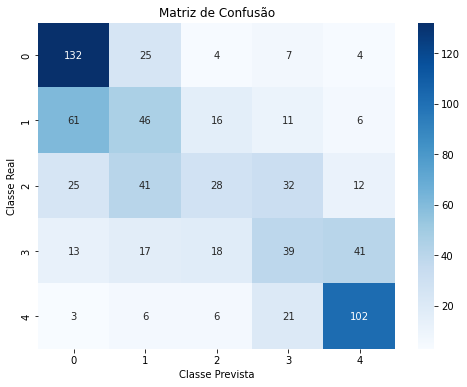

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt





# Criar o modelo de regressão logística
model = LogisticRegression(max_iter=1000,solver='liblinear')

# Treinar o modelo com os dados de treinamento
model.fit(X_train, y_train)

# Fazer previsões com os dados de teste
y_pred = model.predict(X_test)

# Avaliar a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)
print("accuracy: {:.2f}%".format(accuracy * 100))

# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Exibir a matriz de confusão
print("Matriz de Confusão:")
#print(cm)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão")
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")
plt.show()




In [37]:

from sklearn.tree import DecisionTreeClassifier

# Criar o modelo de árvore de decisão
model = DecisionTreeClassifier()

# Treinar o modelo com os dados de treinamento
model.fit(X_train, y_train)

# Fazer previsões com os dados de teste
y_pred = model.predict(X_test)

# Avaliar a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)
print("accuracy: {:.2f}%".format(accuracy * 100))

accuracy: 42.60%


In [38]:
from sklearn.ensemble import RandomForestClassifier

# Criar o modelo de Random Forest
model = RandomForestClassifier(random_state=2022, n_estimators=200, max_depth=10, min_samples_split=5)

# Treinar o modelo com os dados de treinamento
model.fit(X_train, y_train)

# Fazer previsões com os dados de teste
y_pred = model.predict(X_test)

# Avaliar a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)
print("accuracy: {:.2f}%".format(accuracy * 100))

accuracy: 48.04%


In [39]:
from sklearn.svm import SVC

# Criar o modelo SVM com hiperparâmetros personalizados
model = SVC(kernel='rbf', C=1.0, gamma='scale')

# Treinar o modelo com os dados de treinamento
model.fit(X_train, y_train)

# Fazer previsões com os dados de teste
y_pred = model.predict(X_test)

# Avaliar a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)
print("accuracy: {:.2f}%".format(accuracy * 100))

accuracy: 38.55%


/home/antoniolmf/anaconda3/envs/daa/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:02:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy: 49.86%
Matriz de Confusão:


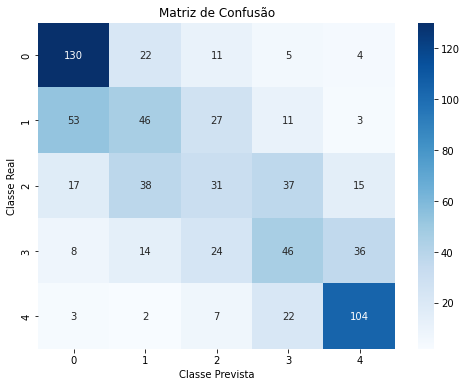

In [42]:
from xgboost import XGBClassifier

# Criar o modelo XGBoost com hiperparâmetros personalizados
model = XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=3, random_state = 2022)

# Treinar o modelo com os dados de treinamento
model.fit(X_train, y_train)

# Fazer previsões com os dados de teste
y_pred = model.predict(X_test)




# Avaliar a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)
print("accuracy: {:.2f}%".format(accuracy * 100))

# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Exibir a matriz de confusão
print("Matriz de Confusão:")
#print(cm)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão")
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")
plt.show()

Mean Squared Error: 1.1634078212290502
Accuracy: 0.49860335195530725
Matriz de Confusão:


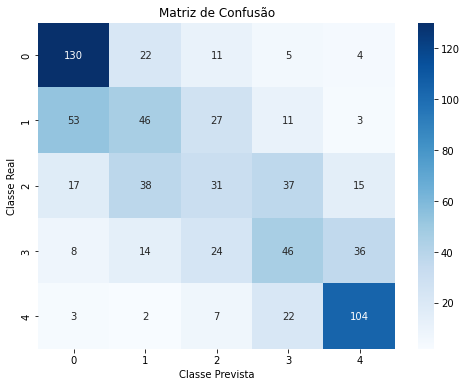

In [44]:
import lightgbm as lgb

model = lgb.LGBMClassifier(learning_rate=0.01, num_leaves=30, n_estimators=300)
model.fit(X_train, y_train)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calcular a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Exibir a matriz de confusão
print("Matriz de Confusão:")
#print(cm)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão")
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir os hiperparâmetros a serem ajustados
param_grid = {
    'learning_rate': [0.1, 0.01],
    'num_leaves': [20, 30, 40],
    'n_estimators': [100, 200, 300]
}

# Criar o modelo LightGBM
model = lgb.LGBMClassifier()

# Criar o objeto GridSearchCV para realizar a pesquisa em grade
grid_search = GridSearchCV(model, param_grid, cv=3)

# Realizar a busca pelos melhores hiperparâmetros
grid_search.fit(X_train, y_train)

# Obter os melhores hiperparâmetros encontrados
best_params = grid_search.best_params_

# Imprimir os melhores hiperparâmetros encontrados
print("Best Parameters:", best_params)

# Obter o modelo com os melhores hiperparâmetros
best_model = grid_search.best_estimator_

# Fazer previsões com o melhor modelo
y_pred = best_model.predict(X_test)

# Calcular a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
